In [23]:


import pandas as pd


data0=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Art.csv",index_col=0)
data1=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Sports.csv",index_col=0)
data2=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Economy.csv",index_col=0)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data0.head()

,Article Title,Category
0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art


In [26]:
data1.head()

,Article Title,Category
0,\n\nFans in shock after Leicester City helicop...,sports
1,\n\nLeicester City football club owner was on ...,sports
2,\n\nLeicester City football club owner's helic...,sports
3,\n\nRonaldo scores twice as Juve overcome frig...,sports
4,\n\nKlopp hails Liverpool's '20-point win' ove...,sports


In [27]:
data2.head()

,Article Title,Category
0,"\n\nChinese demand, Mideast turmoil boost ship...",economy
1,\n\nEgypt government to issue LE1 bn in zero c...,economy
2,\n\nFirst Egyptian Samsung factory starts prod...,economy
3,\n\nUPDATED: Egyptian and Arab stocks soar as ...,economy
4,\n\nGreek high school teachers to strike over ...,economy


In [56]:
# merge all data
total_data=pd.concat([data0,data1,data2])

total_data

,Article Title,Category
0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art
...,...,...
9975,Egypt imposes three-month export ban on cookin...,economy
9976,"Egypt bans export of wheat, other staples for ...",economy
9977,"Egypt’s annual inflation hit 10% in February, ...",economy
9978,INTERVIEW: EBRD supports Egypt’s green transfo...,economy


<Axes: >

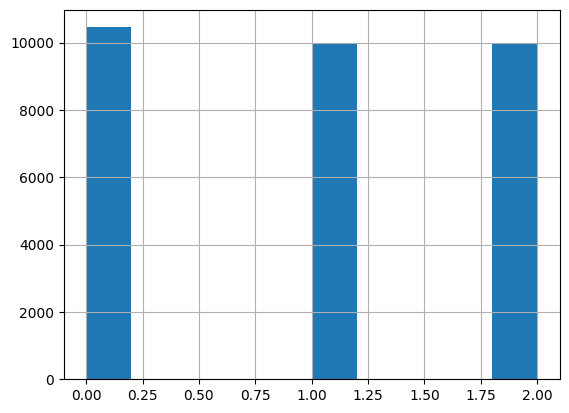

In [53]:
# Show label

total_data["Category"].hist()

In [54]:
# Check the data include null or not
total_data.isna().sum()

Article Title    0
Category         0
dtype: int64

In [57]:
# print the information of the data

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30437 entries, 0 to 9979
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article Title  30437 non-null  object
 1   Category       30437 non-null  object
dtypes: object(2)
memory usage: 713.4+ KB


In [29]:
import re

# clean the data
def clean(text):

    text=re.sub(r"\d+","",text)

    text=text.lower()
    text=re.sub(r"[^\w\s+]","",text)
    text=re.sub(r"\n","",text)
    return text



total_data["Article Title"]=total_data["Article Title"].apply(clean)

In [30]:
total_data["Article Title"]

0       works by picasso and others stolen in spain pi...
1       salwa and maged at the art corner gallery exhi...
2       a tribute to abdalla goharon  december khan al...
3       raw untamed and compelling flesh by samir foua...
4       from water to mosaicsthe gezira centre for mod...
                              ...                        
9975    egypt imposes threemonth export ban on cooking...
9976    egypt bans export of wheat other staples for  ...
9977    egypts annual inflation hit  in february the h...
9978    interview ebrd supports egypts green transform...
9979    biden signing order on cryptocurrency as its u...
Name: Article Title, Length: 30437, dtype: object

In [31]:
label=total_data["Category"].unique()
label

array(['Art', 'sports', 'economy'], dtype=object)

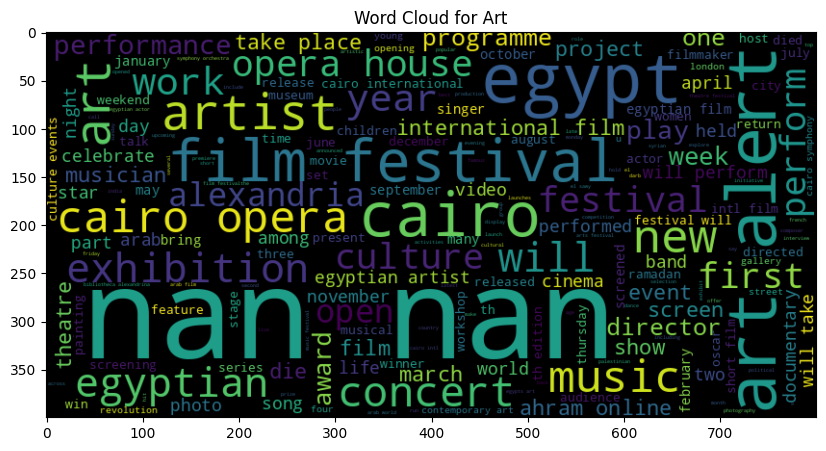

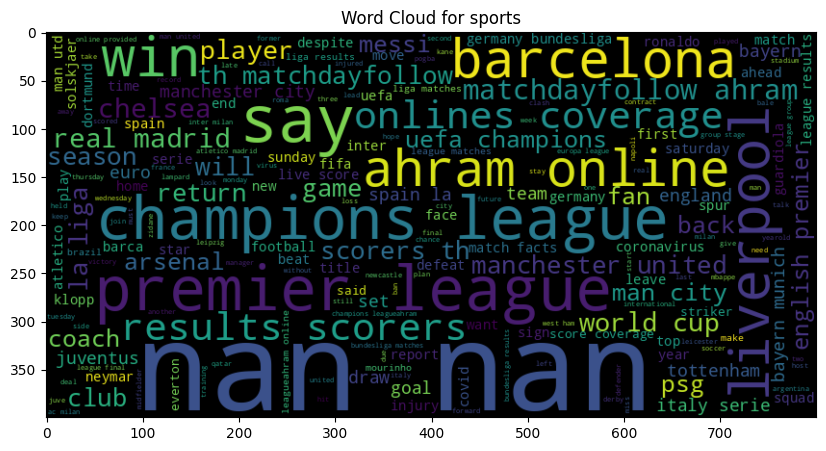

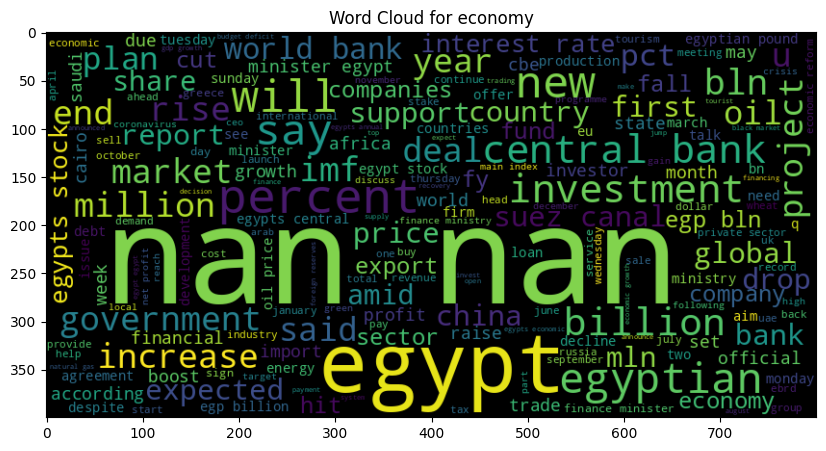

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for i in label:
  # Concatenate all the words into a single string
  text = ' '.join((total_data["Article Title"].where(total_data["Category"]==f"{i}")).astype(str).tolist())

  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('on')
  plt.title(f'Word Cloud for {i}')
plt.show()

In [33]:
# divide the sentance acording to ? , space or !


from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

def tokenize(text):
    tok=word_tokenize(text)

    return tok


total_data["Article Title"]=total_data["Article Title"].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
total_data["Article Title"]

0       [works, by, picasso, and, others, stolen, in, ...
1       [salwa, and, maged, at, the, art, corner, gall...
2       [a, tribute, to, abdalla, goharon, december, k...
3       [raw, untamed, and, compelling, flesh, by, sam...
4       [from, water, to, mosaicsthe, gezira, centre, ...
                              ...                        
9975    [egypt, imposes, threemonth, export, ban, on, ...
9976    [egypt, bans, export, of, wheat, other, staple...
9977    [egypts, annual, inflation, hit, in, february,...
9978    [interview, ebrd, supports, egypts, green, tra...
9979    [biden, signing, order, on, cryptocurrency, as...
Name: Article Title, Length: 30437, dtype: object

In [36]:

# remove the stop words from strings


from nltk.corpus import stopwords
nltk.download('stopwords')

stop=stopwords.words("english")


def remove_stop_words(text):

    return [i for i in text if i not in stop]


total_data["Article Title"]=total_data["Article Title"].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# put the words in the orignal maening

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

limit=WordNetLemmatizer()

def limitization(text):

    return " ".join([limit.lemmatize(i) for i in text])

total_data["Article Title"]=total_data["Article Title"].apply(limitization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
total_data["Article Title"]

0       work picasso others stolen spain picasso art s...
1       salwa maged art corner gallery exhibiting pain...
2       tribute abdalla goharon december khan al maghr...
3       raw untamed compelling flesh samir fouadcrude ...
4       water mosaicsthe gezira centre modern art exhi...
                              ...                        
9975    egypt imposes threemonth export ban cooking oi...
9976    egypt ban export wheat staple monthsegypts min...
9977    egypt annual inflation hit february highest th...
9978    interview ebrd support egypt green transformat...
9979    biden signing order cryptocurrency use explode...
Name: Article Title, Length: 30437, dtype: object

In [39]:
# Encoding the label

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

total_data["Category"]=label_encoder.fit_transform(total_data["Category"])

total_data["Category"]

0       0
1       0
2       0
3       0
4       0
       ..
9975    1
9976    1
9977    1
9978    1
9979    1
Name: Category, Length: 30437, dtype: int64

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf=TfidfVectorizer()


tfidf_matrix =tfidf.fit_transform(total_data["Article Title"])

tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(tfidf_matrix,total_data["Category"],test_size=0.2,random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB


model=MultinomialNB()

model.fit(x_train,y_train)

MultinomialNB()

In [59]:
pred=model.predict(x_test)
pred

array([0, 2, 1, ..., 0, 1, 0])

In [52]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9866951379763469
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2107
           1       0.98      0.99      0.99      2003
           2       0.99      0.99      0.99      1978

    accuracy                           0.99      6088
   macro avg       0.99      0.99      0.99      6088
weighted avg       0.99      0.99      0.99      6088

